# url: https://note.com/nojicom/n/n84fa03fac71f

# Pythonで統計的仮説検定（t検定）を実装

## 統計的仮説検定とは
統計的仮説検定は、ある母集団に対する仮説を立て、その仮説が正しいかどうかを確かめるための方法です。具体的には、標本データを用いて、母集団に関する仮説を立て、その仮説が正しいかどうかを確率的に判断します。

統計的仮説検定は以下ステップで実行します。

1. 仮説の設定：検定する仮説（帰無仮説）と、その反対の仮説（対立仮説）を設定します。帰無仮説は、通常、母集団に差はない、または効果はないという仮説です。一方、対立仮説は、母集団に差がある、または効果があるという仮説です。

ここで大切なのは差がないということを否定（棄却）することで差があるということを示すという考え方です。

2. 検定統計量の決定：検定統計量は、標本データから計算される統計量で、帰無仮説が成り立つ場合の分布が既知であると仮定して、検定統計量を計算します。

3. 有意水準の決定：有意水準は、帰無仮説が正しいと仮定した場合に、誤って帰無仮説を棄却してしまう確率を表します。一般的に、有意水準は0.05や0.01がよく使われます。

4. 検定統計量の計算：標本データから検定統計量を計算します。

5. p値の計算：p値は、帰無仮説が成り立つ場合に、検定統計量が観測された値以上になる確率です。p値が有意水準以下であれば、帰無仮説を棄却します。

6. 結論の導出：p値が有意水準以下であれば、帰無仮説を棄却し、対立仮説を採択します。逆に、p値が有意水準以上であれば、帰無仮説を採択します。

今回はt検定を用いて2つのデータセットの平均値の差があるのかを検定します。

t検定は、2つのサンプルの平均値が等しいかどうかを検定する統計的な手法です。具体的には、2つのサンプルから計算されるt検定統計量を、t分布の表に基づいて評価し、p値を算出します。p値が有意水準よりも小さい場合、2つのサンプルの平均値には差があると判断され、帰無仮説（「2つのサンプルの平均値は等しい」という仮説）が棄却されます。

実際に使用する場面では、条件A/Bでそれぞれ何回か実験をして出たデータに差があった場合にその差は統計的に有意であるのかを確認するために使用します。

## Python で実装
Pythonで統計的仮説検定を実装するには、多くのライブラリが利用可能ですが、ここでは代表的なライブラリであるscipyを用いた方法を紹介します。

例として、2つの正規分布からのサンプルを比較し、それらが異なるかどうかを検定することを考えます。以下のようなステップで実装できます。

必要なライブラリをインポートする。

In [1]:
import numpy as np
from scipy.stats import ttest_ind

In [2]:
# 2つの正規分布からのサンプルを生成する。
# 意図的に平均値をずらして作ります。この差が検定で有意な差であるかを確認しましょう。

sample1 = np.random.normal(loc=0.0, scale=1.0, size=100)
sample2 = np.random.normal(loc=0.5, scale=1.0, size=100)

# ここでは、locは平均値、scaleは標準偏差、sizeは生成するサンプルの数を表します。

## ヒストグラムで分布を見てみる

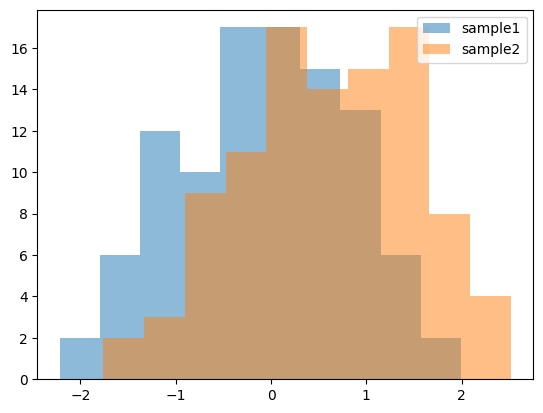

In [3]:
import matplotlib.pyplot as plt

# ヒストグラムを描画
plt.hist(sample1, alpha=0.5, label='sample1')
plt.hist(sample2, alpha=0.5, label='sample2')
plt.legend(loc='upper right')
plt.show()

In [4]:
# サンプルの平均値が異なるかどうかをttest_ind関数を用いて検定する
stat, p = ttest_ind(sample1, sample2)
print('t検定統計量:', stat)
print('p値:', p)

# ttest_ind関数の戻り値
# t検定統計量とp値が返されます。t検定統計量は、2つのサンプルの平均値の差を、標準誤差で割った値です。
# p値は、帰無仮説が成り立つ場合に、観測されたt検定統計量が得られる確率です。
# つまりこれが起こる確率が5%以下であればたまたま起きるには、確率低すぎる＝たまたまではない。よって棄却できるというわけですね。

t検定統計量: -4.938444447184858
p値: 1.6698391300670765e-06


In [5]:
alpha = 0.05 # 有意水準を0.05に設定
if p < alpha:
    print("帰無仮説を棄却し、2つの分布は異なると判断されました。")
else:
    print("帰無仮説を採択し、2つの分布には有意な差はないと判断されました。")

# 先ほどの例では、p値が: 0.000009371247909175328　でした
# 有意水準が0.05で帰無仮説を棄却することができます。
# つまり、2つのサンプルの平均値が等しいという帰無仮説は、棄却され、代わりに2つのサンプルの平均値が異なるという対立仮説が採択されることになります。

帰無仮説を棄却し、2つの分布は異なると判断されました。


## 応用：２つのデータセットのサンプル数が異なる場合

2つのデータセットのサンプル数が異なる場合、Welchのt検定を使います。Welchのt検定は、2つのサンプルの平均値が等しいかどうかを検定する方法で、2つのサンプルの分散が異なる場合に適用されます。

Pythonのscipy.statsモジュールには、Welchのt検定を行うttest_ind関数が用意されています。ttest_ind関数を使う場合は、引数にequal_var=Falseを指定して、等分散性を仮定しないようにします。以下は、サンプル数が異なる2つのデータセットを用いたWelchのt検定の例です。

In [6]:
from scipy.stats import ttest_ind

# サンプル1とサンプル2を生成
sample1 = [1, 2, 3, 4, 5]
sample2 = [2, 4, 6, 8, 10, 12, 14]

# Welchのt検定を実行
stat, p = ttest_ind(sample1, sample2, equal_var=False)

# 結果を表示
print('t検定統計量:', stat)
print('p値:', p)

t検定統計量: -2.809757434745082
p値: 0.022747255279670916
